Give the Poisson process, i.e. the first order differential equation that
results in P0(τ ), the probability that τ days after card purchase the card
has not been used yet.

The probability $P(0; \tau)$ of the card not being used at time $\tau$ gives us

$$
\frac{\partial}{\partial \tau} P(0,\tau) = -p(\tau) P(0,\tau)
$$

so

$$
\int \frac{1}{P(0,\tau)}\frac{\partial}{\partial \tau} P(0,\tau) \partial \tau = \int -p(\tau) \partial \tau
$$

$$
\begin{aligned}
\Rightarrow \log{(P(0,\tau))} &= \int_{0}^{\tau}-p(\tau) \partial\tau\\
P(0,\tau) &= e^{\int_{0}^{\tau}-p(\tau) \partial\tau}\\
\end{aligned}
$$


Give the Poisson process, i.e. the first order differential equation that
results in Q0(τ ), the probability that τ days after card purchase the card
has not been lost yet.



$$
\frac{\partial}{\partial \tau} Q(0,T) = -q Q(0,\tau)
$$

so

$$
\int \frac{1}{Q(0,\tau)}\frac{\partial}{\partial \tau} P(0,\tau) \partial \tau = \int -q \partial \tau
$$

$$
\begin{aligned}
\Rightarrow \log{(Q(0,\tau))} &= \left[-q\tau + C_0\right]_{0}^{\tau}\\
Q(0,\tau) &= e^{-q\tau}\\
\end{aligned}
$$


Work out P(τ ) to arrive at
P(τ ) = pe
−qτ−
p
q (1−e
−qτ )


given $p(\tau) = pe^{-q\tau}$

$$
\begin{aligned}
P(\tau) &= p(\tau)e^{-\int_{0}^{\tau}p(s)\partial s}\\
&= pe^{-q\tau}e^{-\int_{0}^{\tau}pe^{-qs}\partial s}\\
&= pe^{-q\tau}e^{\left[ \frac{p}{q} e^{-qs} \right]_{0}^{\tau}} \\
&= pe^{-q\tau}e^{\frac{p}{q} e^{-q\tau} - \frac{p}{q}} \\
&= pe^{-q\tau - \frac{p}{q} \left(1 - e^{-q\tau}\right)}\\
\end{aligned}
$$

Derive equation 4

The probability of a card bought at $t_0$ and used at $t_1$ is the probability of being used in the time interval $\tau = t_1 - t_0$ - the probability of not being used

$$
\begin{aligned}
P(1,\tau) &= pe^{-q\tau} - pe^{-q\tau - \frac{p}{q} \left(1 - e^{-q\tau}\right)}\\
&= pe^{-q\tau}\left(1 - e^{- \frac{p}{q} \left(1 - e^{-q\tau}\right)}\right)\\
\Rightarrow Norm(\tau) &= 1 - e^{- \frac{p}{q} \left(1 - e^{-q\tau}\right)}\\
\end{aligned}
$$

Derive equation 5

$$
\begin{aligned}
P(0,\tau) &= 1 - Norm(\tau) \\
&= e^{- \frac{p}{q} \left(1 - e^{-q\tau}\right)} \\
\end{aligned}
$$

Read in the provided dataset and split it into two, one of cards that have
been used, and one of cards that have not been used yet. You are allowed to
express purchase and use days as the number of days since 3-3-2013 to avoid
working with datetimes. (fuck datetimes)

In [10]:
%matplotlib inline

import scipy.constants
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import scipy as sp
from scipy.optimize import minimize
from matplotlib.patches import Ellipse
from datetime import date

In [11]:
reader = csv.reader(open('tentamen_data.csv'));

t0 = date(2013,3,3)
t1 = date(2014,4,7)

# Read data
skippedHeader = False
used = []
unused = []

for entry in reader:
    if not skippedHeader:
        skippedHeader = True
        continue
    purchased_date = date(int(entry[0][0:4]),int(entry[0][5:7]),int(entry[0][8:10]))
    if entry[1]:
        used_date = date(int(entry[1][0:4]),int(entry[1][5:7]),int(entry[1][8:10]))
        #this is a hack to avoid card purchased and spent on the same day
        #minimum 1 day existence for a card
        used.append({'purchased' : (purchased_date - t0).days, 'used' : (used_date - t0).days + 1})
    else:
        unused.append({'purchased' : (purchased_date - t0).days})
        
        
# for entry in unused:
#     print entry['purchased']


In [23]:
# for entry in used:
#     print entry

Explain why the normalization factor is needed in equation 6.

**just a guess - think about this again**
The normalization is needed because not all the time deltas will be the same so we need to normalize with respect to the evidence

For the used cards minimize the log-likelihood of equation 7 to obtain your
estimate of q and p.

In [ ]:
def n(p,q):
    return 1 - math.exp((-p / q) * (1 - math.exp(-q * (t1 - t0).days)))

def P(p,q,tau):
    return p * math.exp(-q*tau - (p/q) * (1 - math.exp(-q * tau)))


def ll(p,q):
    L = 0
    for entry in used:
        try:
            L += math.log(P(p,q,entry['used'] - entry['purchased']) / n(p,q))#,entry['used'] - entry['purchased']))
        except:
            return float('inf')
            
    return (-2 * L)

def G(x):
    return ll(x[0],x[1])

p = np.linspace(1,500,10) # range(1,10) # 
q = np.linspace(1,500,10) # range(1,10) #

results = []
mins = []

for i in range(0,10):
    minimized = minimize(G,[p[i],q[i]], method='Powell')
    results.append(minimized.x) # optimized parameters
    mins.append(minimized.fun) # score of the parameter

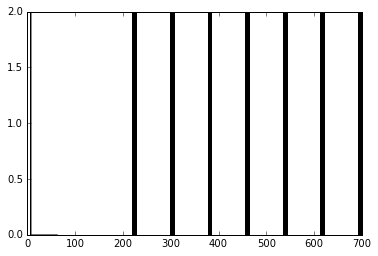

In [48]:
plt.hist(results, bins=10)
plt.show()


In [ ]:
# plt.plot(range(1,100), mins)
# plt.show()

print mins